In [1]:
# Import Necessary Libarais
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing/Nomarlizing
from sklearn.preprocessing  import StandardScaler

# Models
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Import csv file to dataframe
df = pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/cardio_train.csv',sep=';')

# Top five rows
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [3]:
# No. of rows and columns
df.shape

(69301, 13)

In [4]:
# Information of each column and its datatype and its counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69301 non-null  int64  
 1   age          69301 non-null  int64  
 2   gender       69301 non-null  int64  
 3   height       69301 non-null  int64  
 4   weight       69301 non-null  float64
 5   ap_hi        69301 non-null  int64  
 6   ap_lo        69301 non-null  int64  
 7   cholesterol  69301 non-null  int64  
 8   gluc         69301 non-null  int64  
 9   smoke        69301 non-null  int64  
 10  alco         69301 non-null  int64  
 11  active       69301 non-null  int64  
 12  cardio       69301 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
# Verify missing values
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [6]:
# Summary of dataset
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# Drop Id coluns and remove duplicate
df.drop(columns='id',axis=1,inplace=True)

In [8]:
# Observations

# No. missing values
# Assuming Age is in no of days
# Outliears in Height,weight
# Outliers in ap_high
# Outliers in ap-low
# seems cholestrol and glucose are binary. we will see in further analysis

In [9]:
# Duplicates Removel
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(69277, 12)

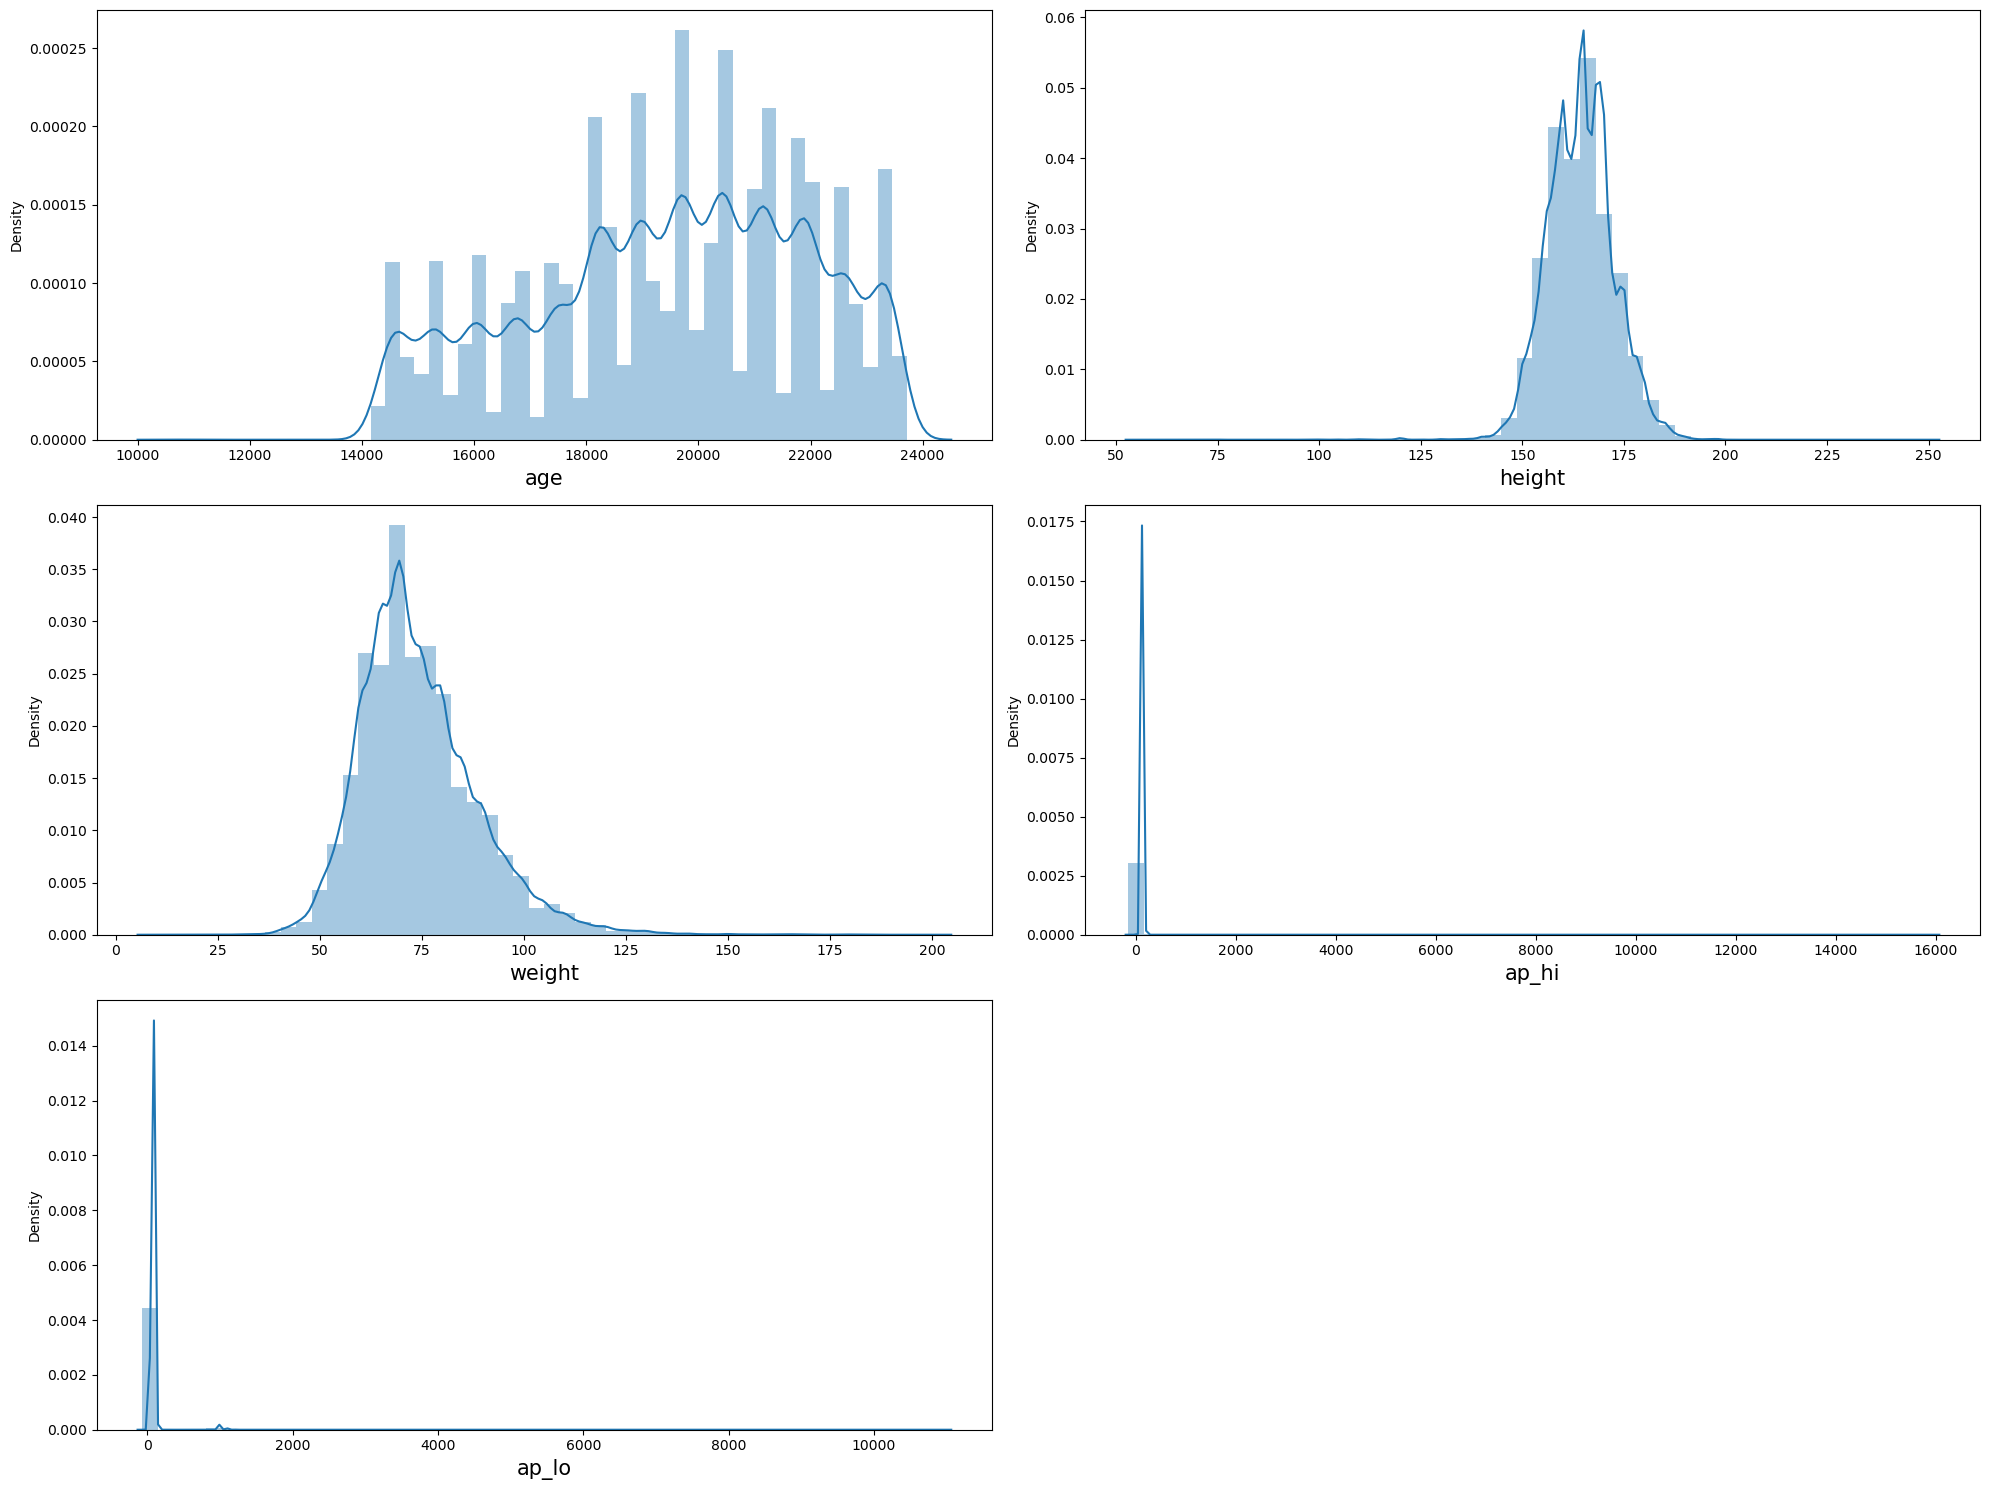

In [11]:
# Let's see how to data distributed of some columns using distplot

plt.figure(figsize=(20,15))
plotnumber = 1

for column in df[['age','height','weight','ap_hi','ap_lo']]:
    if plotnumber<=6:
        plt.subplot(3,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [28]:
# Let's transform our normal distribution into Z-Distribution (Standard Normal Distribution)
# where mean = 0 ,std = 1, z-score = (X-mean)/std

from scipy.stats import zscore

z_score = zscore(df[['age','height','weight','ap_hi','ap_lo']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis=1)

df = df[filtering_entry]

df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,65141.000000,65141.000000,65141.000000,65141.000000,65141.000000,65141.000000,65141.000000,65141.000000,65141.000000,65141.000000,65141.000000,65141.000000
mean,19455.829539,1.345159,164.366190,73.177357,125.577455,80.838182,1.355306,1.219892,0.086336,0.052241,0.804378,0.484902
std,2468.537592,0.475424,7.594229,12.714748,14.942729,8.673016,0.672403,0.566166,0.280861,0.222513,0.396682,0.499776
min,14277.000000,1.000000,142.000000,35.450000,85.000000,55.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17648.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19697.000000,1.000000,165.000000,71.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21317.000000,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,187.000000,111.000000,170.000000,106.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
df.shape

(65141, 12)

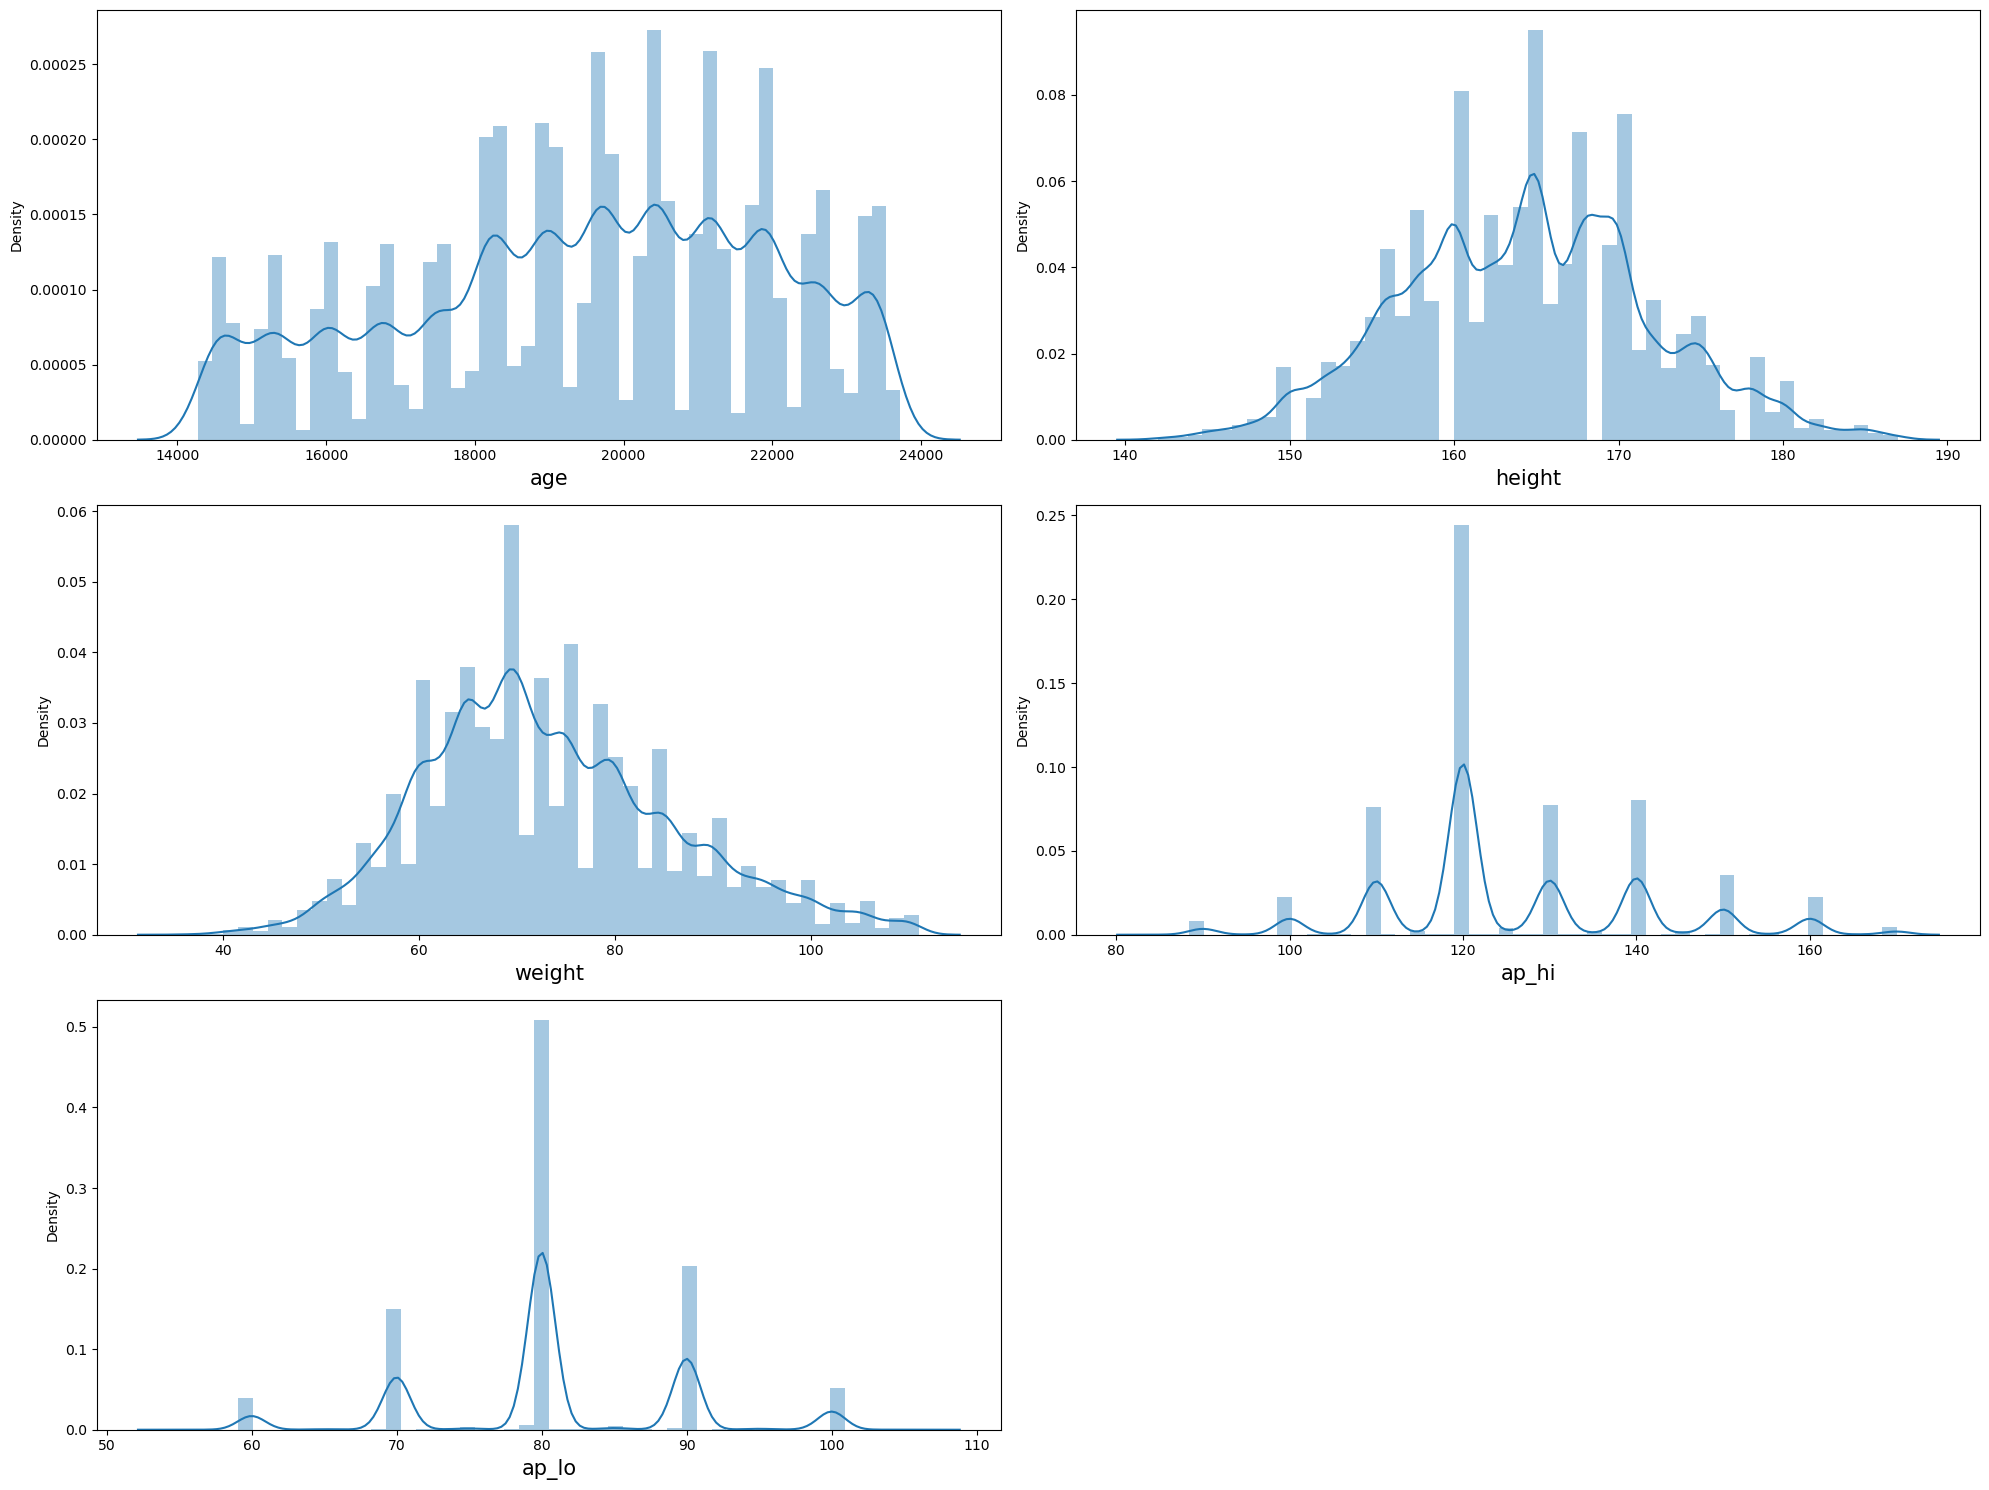

In [30]:
# Let's see how to data distributed of some columns using distplot

plt.figure(figsize=(20,15))
plotnumber = 1

for column in df[['age','height','weight','ap_hi','ap_lo']]:
    if plotnumber<=6:
        plt.subplot(3,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()